# SPAM CLASSIFIER
The objective of this project is to compare the performance of two popular Naive Bayes Spam Classifiers

+ Multi-variate Bernoulli event model
+ Multinomial event model

In [1]:
%load_ext autoreload
%autoreload 2
import module
import matplotlib.pyplot as plt
import glob
import numpy as np

# Spam Dataset
The [Ling-Spam](http://csmining.org/index.php/ling-spam-datasets.html) corpus is used for training the models.

+ 2400 Hams (Non-Spam)
+ 500 Spams

All mails were preprocessed before classification/training/testing

+ 70% of all mails (Ham and Spam) used for training
+ 30% of all mails (Ham and Spam) used for testing


## Preprocessing
All the mails in the `bare` subdirectory were preprocessed using the `process.py` script and stored in another directory. 
The following email preprocessing and normalization steps were carried out in the given order:

+ Lower casing
+ Stripping HTML tags
+ Normalizing URLs
+ Normalizing email addresses
+ Normalizing numbers
+ Normalizing currency symbols
+ Removal of non-word characters
+ Stop Word removal
+ Word Stemming

### Word Stemming
The [Porter Stemming algorithm](https://tartarus.org/martin/PorterStemmer/) which was ported to Python from the
version coded up in ANSI C by the author was used for word stemming.

## Dictionary

+ Each entry is a tuple with word and frequency as attributes
+ Generated from the entire dataset
+ Top ten thousand most frequent words used to train classifiers


In [2]:
def plot_words(ax, xs, words):
    ys = [i + 0.2 for i, _ in enumerate(words)]
    my_colors = [(x/10.0, 0, 0.4) for x in range(len(xs))]
    ax.barh(ys , xs, height=0.6, alpha=0.75, color=my_colors)
    ax.set_yticks([i +0.5 for i, _ in enumerate(words)])
    ax.set_yticklabels(words)

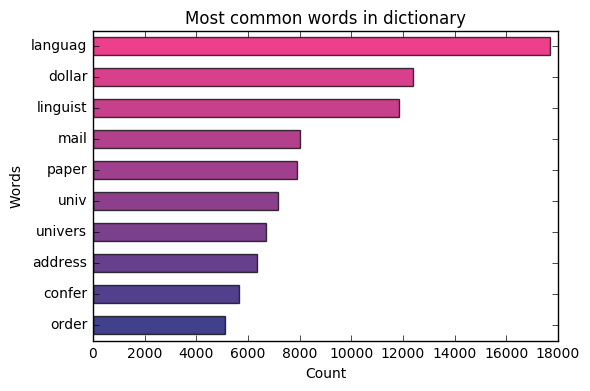

In [3]:
path = r".\lingspam_public\processed\**\*.txt"
dictionary = module.generate_dictionary(path)
most_common_words = dictionary.most_common(11)[1:]
most_common_words.reverse()
words, counts = zip(*most_common_words)
ys = [i + 0.2 for i, _ in enumerate(words)]
fig, ax = plt.subplots()
plot_words(ax, counts, words)
ax.set_xlabel("Count")
ax.set_ylabel("Words")
ax.set_title("Most common words in dictionary")
plt.show()

# Training Classifier

In [4]:
# Choose N most common words form the dictionary for training
N = 10000
lis_words, _ = zip(*dictionary.most_common(N))

In [5]:
training_set = [(r'.\lingspam_public\processed\ham\*', 0),
                (r'.\lingspam_public\processed\spam\*', 1)]

def train_model(model, emails):
    for path, is_spam in emails:
        model.train(path, is_spam)

# Testing Classifier

In [6]:
testing_set = [(r'.\lingspam_public\processed\ham_test\*', 0),
               (r'.\lingspam_public\processed\spam_test\*', 1)]

class analyze:
    def __init__(self):
        # total number of mails
        self.total = 0
        # Dict containing counts corresponding to each category
        self.category = [0]*4
        # List of mails which were misclassified
        self.misclassified = []
        self.accuracy = 0.0
        self.precision = 0.0
        self.recall = 0.0
        self.Fscore = 0.0
    
    def calculate(self):
        '''Calculate statistics'''
        self.accuracy = ((self.category[3] + self.category[0])*
                        100/self.total)
        self.precision  = (self.category[3]/
                          (self.category[3] + self.category[2]))
        self.recall = (self.category[3]/
                      (self.category[3] + self.category[1]))
        self.Fscore = (2*self.precision*self.recall/
                       (self.precision+self.recall)) 
        
    def __repr__(self):
        str_show = ""
        str_show += 'Total mails : ' + str(self.total)
        str_show += '\n' + 'Accuracy : ' + ('%.2f' % self.accuracy)
        str_show += '\n' + 'Precision : ' + ('%.2f' % self.precision)
        str_show += '\n' + 'Recall : ' + ('%.2f' % self.recall)
        str_show += '\n' + 'F Score : ' + ('%.4f' % self.Fscore)
        return str_show

def categorize(predicted, actual):
    '''Categories:
    00: True Negative
    01: False Negative
    10: False Positive
    11: True Positive 
    '''
    return predicted*2 + actual

def test_model(model, emails): 
    res = analyze()   
    for path, is_spam in emails:
        for path_name in glob.iglob(path, recursive=True):
            with open(path_name, "r") as f:
                categ = categorize(model.classify(f.read(),
                                                  preprocess=False),
                                   is_spam)
                res.category[categ] += 1
                if categ==1 or categ==2:
                    res.misclassified.append(path_name)
                res.total += 1 
    res.calculate()
    return res

# Multivariate Bernoulli event model

In [7]:
#%%timeit
model1 = module.multivariateNBClassifier(lis_words)
train_model(model1, training_set)

In [8]:
#%%timeit
model1_train_res = test_model(model1, training_set)
model1_test_res = test_model(model1, testing_set)
print("Training Set\n%s" % model1_train_res)
print("\nTesting Set\n%s" % model1_test_res)

Training Set
Total mails : 2025
Accuracy : 98.17
Precision : 0.98
Recall : 0.91
F Score : 0.9428

Testing Set
Total mails : 868
Accuracy : 97.93
Precision : 0.98
Recall : 0.89
F Score : 0.9343


## Misclassified mails

In [9]:
print("\n".join(model1_test_res.misclassified))

.\lingspam_public\processed\ham_test\6-1011msg1.txt
.\lingspam_public\processed\ham_test\6-408msg1.txt
.\lingspam_public\processed\spam_test\spmsga12.txt
.\lingspam_public\processed\spam_test\spmsga26.txt
.\lingspam_public\processed\spam_test\spmsga29.txt
.\lingspam_public\processed\spam_test\spmsga6.txt
.\lingspam_public\processed\spam_test\spmsga76.txt
.\lingspam_public\processed\spam_test\spmsga85.txt
.\lingspam_public\processed\spam_test\spmsga98.txt
.\lingspam_public\processed\spam_test\spmsgb107.txt
.\lingspam_public\processed\spam_test\spmsgb111.txt
.\lingspam_public\processed\spam_test\spmsgb112.txt
.\lingspam_public\processed\spam_test\spmsgb126.txt
.\lingspam_public\processed\spam_test\spmsgb16.txt
.\lingspam_public\processed\spam_test\spmsgb164.txt
.\lingspam_public\processed\spam_test\spmsgc44.txt
.\lingspam_public\processed\spam_test\spmsgc61.txt
.\lingspam_public\processed\spam_test\spmsgc90.txt


# Multinomial event model

In [10]:
#%%timeit
model2 = module.multinomialNBClassifier(lis_words)
train_model(model2, training_set)

In [11]:
#%%timeit
model2_train_res = test_model(model2, training_set)
model2_test_res = test_model(model2, testing_set)
print("Training Set\n%s" % model2_train_res)
print("\nTesting Set\n%s" % model2_test_res)

Training Set
Total mails : 2025
Accuracy : 99.60
Precision : 0.98
Recall : 1.00
F Score : 0.9882

Testing Set
Total mails : 868
Accuracy : 99.19
Precision : 0.97
Recall : 0.99
F Score : 0.9759


# Misclassified mails

In [12]:
print("\n".join(model2_train_res.misclassified))

.\lingspam_public\processed\ham\3-425msg2.txt
.\lingspam_public\processed\ham\5-1218msg1.txt
.\lingspam_public\processed\ham\5-1471msg1.txt
.\lingspam_public\processed\ham\6-50msg2.txt
.\lingspam_public\processed\ham\6-809msg3.txt
.\lingspam_public\processed\ham\8-1225msg2.txt
.\lingspam_public\processed\ham\8-922msg3.txt
.\lingspam_public\processed\spam\spmsgc62.txt


In [13]:
# Dump models
import pickle
pickle.dump(model1, 
            open(".\cache\model1_raw.pymod", "wb"), 
            pickle.HIGHEST_PROTOCOL)
pickle.dump(model2, 
            open(".\cache\model2_raw.pymod", "wb"), 
            pickle.HIGHEST_PROTOCOL)

In [14]:
# model1 = pickle.load(open(".\cache\model1_raw.pymod", "rb"))
# model2 = pickle.load(open(".\cache\model2_raw.pymod", "rb"))

# Most Spammy words

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
prob = model1.word_cnt[1]/model1.cnt[1,0]
indices = np.argsort(prob)[-11: -1]
probs = prob[indices]
words = np.array(lis_words)[indices]
plot_words(ax1, probs, words)
ax1.set_xlabel("P(Wi|S)")
ax1.set_ylabel("Words")
ax1.set_title("Multivariate NB model")
ax1.set_xlim([0, 1.0]);

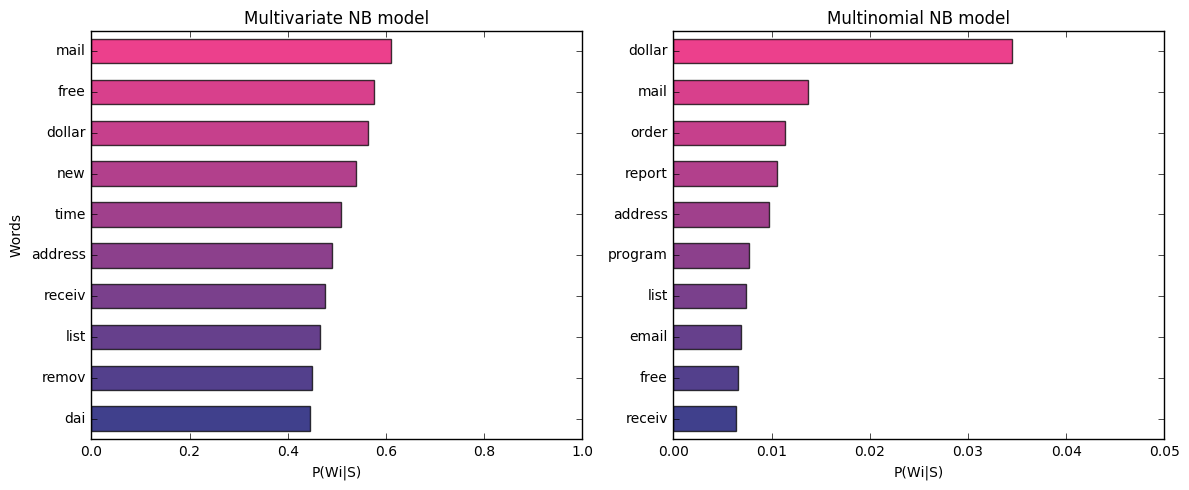

In [16]:
prob = model2.word_cnt[1]/model2.cnt[1]
indices = np.argsort(prob)[-11: -1]
probs = prob[indices]
words = np.array(lis_words)[indices]
plot_words(ax2, probs, words)
ax2.set_xlabel("P(Wi|S)")
ax2.set_title("Multinomial NB model")
ax2.set_xlim([0, 0.05])
plt.tight_layout()
plt.show();

# Most Hammy words

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
prob = model1.word_cnt[0]/model1.cnt[0,0]
indices = np.argsort(prob)[-11: -1]
probs = prob[indices]
words = np.array(lis_words)[indices]
plot_words(ax1, probs, words)
ax1.set_xlabel("P(Wi|S)")
ax1.set_ylabel("Words")
ax1.set_title("Multivariate NB model")
ax1.set_xlim([0.1, 1.0]);

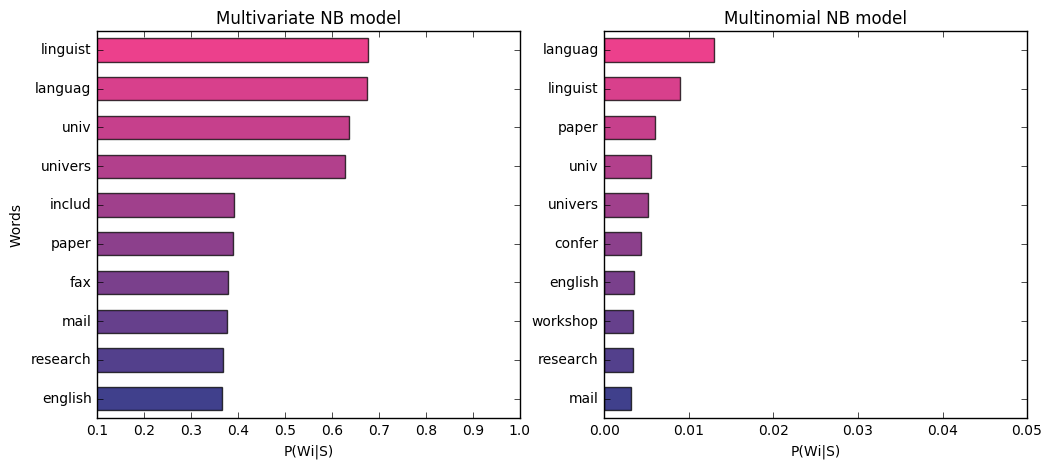

In [18]:
prob = model2.word_cnt[0]/model2.cnt[0]
indices = np.argsort(prob)[-11: -1]
probs = prob[indices]
words = np.array(lis_words)[indices]
plot_words(ax2, probs, words)
ax2.set_xlabel("P(Wi|S)")
ax2.set_title("Multinomial NB model")
ax2.set_xlim([0, 0.05])
#plt.tight_layout()
plt.show();

# Performance analysis

Error classes:

+ True Positive(TP) : Spammy predicted Spammy
+ True Negatives(TN) : Hammy predicted Hammy
+ False Positive(FP) : Hammy predicted as Spammy
+ False Negative(FN) : Spammy predicted Hammy


## Precision 
Ratio of actual spam mails predicted as spam to all predicted spam mails

$$ P = \frac{TP}{TP + FP}$$

## Recall
Ratio of actual spam mails predicted as spam to all spam mails in dataset

$$ R = \frac{TP}{TP + FN}$$

## Fscore
Harmonic Mean of Precision and Recall

$$ P = \frac{2*P*R}{P + R}$$

In [19]:
N_lis = np.r_[100:11000:400]
model1_res = []
model2_res = []
lis_words, _= zip(*dictionary.most_common(15000))
print("Initializing training and testing...")
for i, N in enumerate(N_lis):
    model1 = module.multivariateNBClassifier(lis_words[:N+1])
    train_model(model1, training_set)
    model2 = module.multinomialNBClassifier(lis_words[:N+1])
    train_model(model2, training_set)
    model1_res.append(test_model(model1, testing_set))
    model2_res.append(test_model(model2, testing_set))
    print("Iteration", i, ": N =", N)
print("COMPLETE !!!")

Initializing training and testing...
Iteration 0 : N = 100
Iteration 1 : N = 500
Iteration 2 : N = 900
Iteration 3 : N = 1300
Iteration 4 : N = 1700
Iteration 5 : N = 2100
Iteration 6 : N = 2500
Iteration 7 : N = 2900
Iteration 8 : N = 3300
Iteration 9 : N = 3700
Iteration 10 : N = 4100
Iteration 11 : N = 4500
Iteration 12 : N = 4900
Iteration 13 : N = 5300
Iteration 14 : N = 5700
Iteration 15 : N = 6100
Iteration 16 : N = 6500
Iteration 17 : N = 6900
Iteration 18 : N = 7300
Iteration 19 : N = 7700
Iteration 20 : N = 8100
Iteration 21 : N = 8500
Iteration 22 : N = 8900
Iteration 23 : N = 9300
Iteration 24 : N = 9700
Iteration 25 : N = 10100
Iteration 26 : N = 10500
Iteration 27 : N = 10900
COMPLETE !!!


In [20]:
pickle.dump(model1_res, 
            open(".\cache\model1_res.pymod", "wb"), 
            pickle.HIGHEST_PROTOCOL)
pickle.dump(model2_res, 
            open(".\cache\model2_res.pymod", "wb"), 
            pickle.HIGHEST_PROTOCOL)

In [21]:
# model1 = pickle.load(open(".\cache\model1_res.pymod", "rb"))
# model2 = pickle.load(open(".\cache\model2_res.pymod", "rb"))

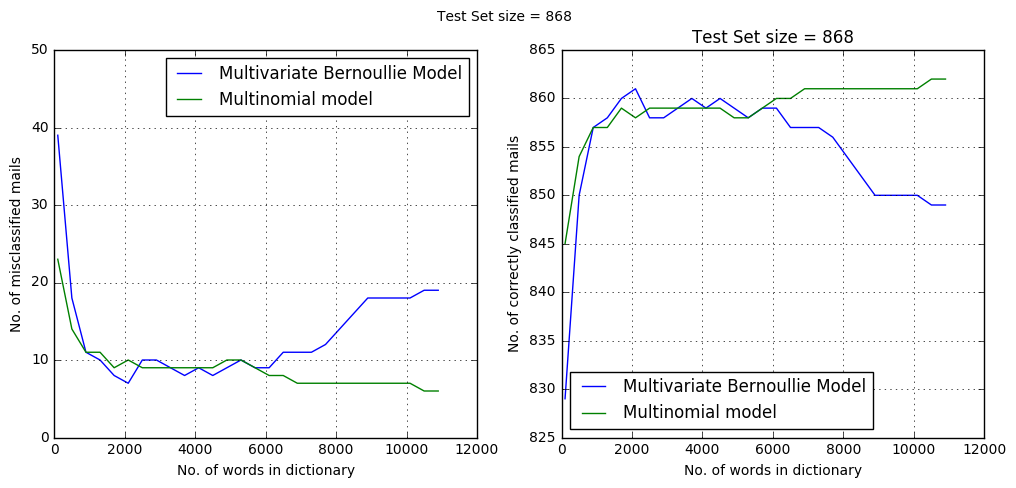

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle("Test Set size = %d" % model1_res[0].total)
# Misclassified mails
ax1.set_xlabel("No. of words in dictionary")
ax1.set_ylabel("No. of misclassified mails")
ax1.plot(N_lis, 
         list([len(res.misclassified) 
               for res in model1_res]), 
         label='Multivariate Bernoullie Model')
ax1.plot(N_lis, 
         list([len(res.misclassified) 
               for res in model2_res]), 
         label='Multinomial model')
ax1.set_ylim([0, 50])
ax1.legend(loc=0)
ax1.grid()
#Correctly classified mails
ax2.set_title("Test Set size = %d" % model1_res[0].total)
ax2.set_xlabel("No. of words in dictionary")
ax2.set_ylabel("No. of correctly classified mails")
ax2.plot(N_lis, 
         list([res.category[0]+res.category[3] 
               for res in model1_res]), 
         label='Multivariate Bernoullie Model')
ax2.plot(N_lis, 
         list([res.category[0]+res.category[3] 
               for res in model2_res]), 
         label='Multinomial model')
ax2.legend(loc=0)
ax2.grid()

plt.show()

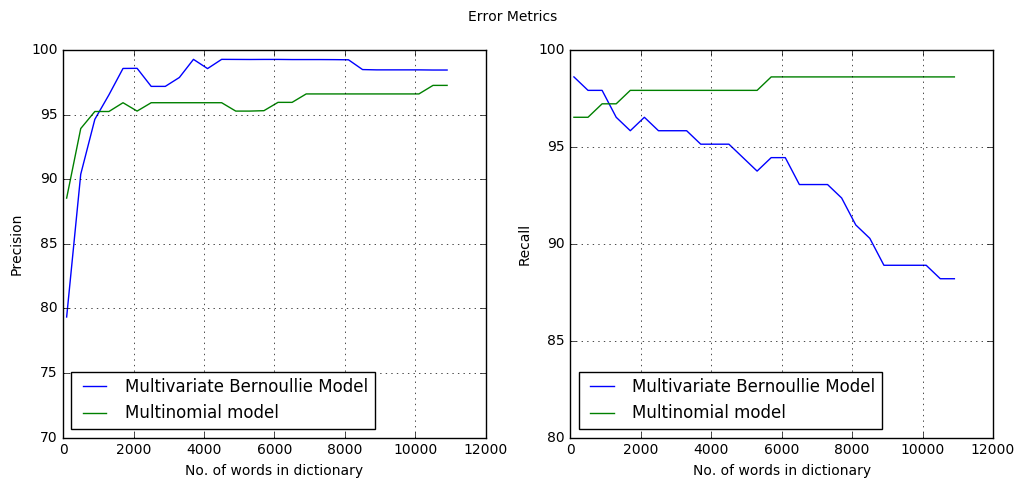

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle("Error Metrics")
# Precision
ax1.set_xlabel("No. of words in dictionary")
ax1.set_ylabel("Precision")
ax1.plot(N_lis, list([res.precision*100 
                      for res in model1_res]), 
         label='Multivariate Bernoullie Model')
ax1.plot(N_lis, list([res.precision*100 
                      for res in model2_res]), 
         label='Multinomial model')
ax1.set_ylim([70, 100])
ax1.legend(loc=0)
ax1.grid()
#Recall
ax2.set_xlabel("No. of words in dictionary")
ax2.set_ylabel("Recall")
ax2.plot(N_lis, list([res.recall*100 
                      for res in model1_res]), 
         label='Multivariate Bernoullie Model')
ax2.plot(N_lis, list([res.recall*100 
                      for res in model2_res]), 
         label='Multinomial model')
ax2.set_ylim([80, 100])
ax2.legend(loc=0)
ax2.grid()
plt.show()

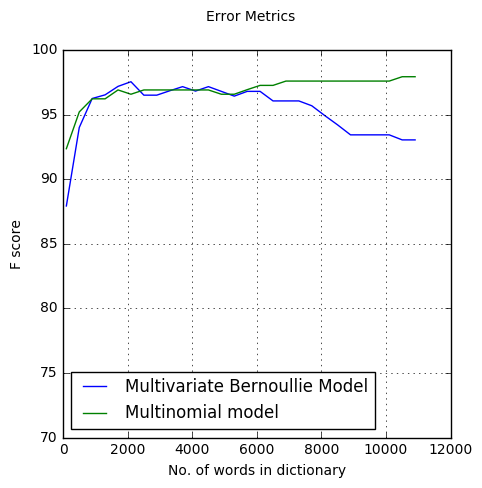

In [24]:
fig, ax1 = plt.subplots(figsize=(5,5))
fig.suptitle("Error Metrics")
# F score
ax1.set_xlabel("No. of words in dictionary")
ax1.set_ylabel("F score")
ax1.plot(N_lis, 
         list([res.Fscore*100 for res in model1_res]), 
         label='Multivariate Bernoullie Model')
ax1.plot(N_lis, 
         list([res.Fscore*100 for res in model2_res]), 
         label='Multinomial model')
ax1.set_ylim([70, 100])
ax1.legend(loc=0)
ax1.grid()
plt.show()

## Test your own email

In [2]:
import pickle
model1 = pickle.load(open(".\cache\model1_raw.pymod", "rb"))
model2 = pickle.load(open(".\cache\model2_raw.pymod", "rb"))

In [3]:
filname = r".\email.txt"
res_string = ['Not Spam', 'Spam']
with open(filname, "r") as f:
    text = f.read()
print(text)

Dear Reader,

40 - 50 million Indians are on medication for serious illness at any given time

Secure yourself with a 3 Lakh Health Cover with 
only Rs 11.75 per day

Also save taxes upto Rs 10,000 for this financial year

The best is now easy to choose with Policyblahblah.com*


In [5]:
print(res_string[model1.classify(text)])

Spam


In [6]:
print(res_string[model2.classify(text)])

Spam
